In [2]:
import numpy as np
import pandas as pd
import psix
import os

from matplotlib import pyplot as plt

from scipy.special import expit, logit

from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [3]:
# platonic_psi = pd.read_csv('sim_output/psi_platonic.tab', sep='\t', 
#                                names = ['cell_'+str(i+1) for i in range(10000)])
# platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

# platonic_psi = expit(platonic_psi)


psix_5 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.001.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.01.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('psix_output_100/k_sensitivity/k_0.05.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('psix_output_100/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_100/k_sensitivity/k_0.15.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_100/k_sensitivity/k_0.2.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('psix_output_100/k_sensitivity/k_0.25.tab.gz', sep='\t', index_col=0)

# pos = []
# neg = []
# for i in range(5000):
#     if ('gene'+str(i+1)) in psix_20.index:

#         if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
#             pos.append('gene'+str(i+1))
#         else:
#         #elif ds[i] == 0:
#             neg.append('gene'+str(i+1))

    
# labels = [1]*len(pos) + [0]*len(neg)
# order = list(pos) + list(neg)

    
# y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

# boxplot_list = []
# for x in [psix_20, psix_30, psix_50, psix_100, psix_150]:
    
#     box = []
#     for i in range(200):
        
#         pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
#         neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

#         labels = [1]*len(pos_sample) + [0]*len(neg_sample)
#         order = list(pos_sample) + list(neg_sample)


#         y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])
        
        
#         pre, rec, thres = precision_recall_curve(y_, x.loc[order].psix_score)
    
#         box.append(auc(rec, pre))

#     boxplot_list.append(box)

    

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_20.index

pos = []
neg = []
order = []
y = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_20.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)
            pos.append('gene'+str(i+1))
            order.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))
            y.append(0)
            order.append('gene'+str(i+1))
    
    
recall_list = []
for x in [psix_20, psix_30, psix_50, psix_100, psix_150]:
    pre, rec, thres = precision_recall_curve(y, x.loc[order].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.fill_between(np.array([5, 10, 15, 20, 25]), [np.quantile(x, 0.05) for x in boxplot_list], 
                 [np.quantile(x, 0.95) for x in boxplot_list], color='skyblue')

ax.plot([1, 1], [np.quantile(boxplot_list[0], 0.05), recall_list[4]], linestyle='--', c='gray')

ax.scatter(np.array([ 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.array([ 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20)

ax.set_xticks(np.array([ 5, 10, 15, 20, 25]))

ax.set_xticklabels(['1%', '2%', '5%', '10%', '20%', '50%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

# ax.set_yticks([0.7, 0.8, 0.9])
# ax.set_yticklabels(['0.7', '0.8', '0.9'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


FileNotFoundError: [Errno 2] No such file or directory: 'psix_output_1000/k_sensitivity/k_0.001.tab.gz'

In [4]:
platonic_psi = pd.read_csv('sim_output/psi_platonic.tab', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(10000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


psix_10000 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_5000 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_1000 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('psix_output_500/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_100/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)


In [72]:
psix_10000

,psix_score,pvals,qvals
gene659,1.335821,0.000500,0.001094
gene2227,1.266156,0.000500,0.001094
gene652,1.158783,0.000500,0.001094
gene308,1.102302,0.000500,0.001094
gene998,1.087936,0.000500,0.001094
...,...,...,...
gene3369,-0.014823,0.997501,0.999230
gene2564,-0.015023,0.997501,0.999230
gene2662,-0.015480,1.000000,1.000000
gene2693,-0.017049,1.000000,1.000000


In [3]:
pos_all = platonic_psi.loc[(platonic_psi.max(axis=1) - platonic_psi.min(axis=1))>= 0.2].index

neg_all = platonic_psi.loc[(platonic_psi.max(axis=1) - platonic_psi.min(axis=1))<= 0.01].index

In [4]:
pos_100 = list(psix_100.loc[pos_all.intersection(psix_100.index)].qvals <= 0.05)
neg_100 = list(psix_100.loc[neg_all.intersection(psix_100.index)].qvals <= 0.05)
results_100 = pos_100 + neg_100
labels_100 = ([1]*len(pos_100) + [0]*len(neg_100))

In [5]:
recall_score(labels_100, results_100)

0.06501766784452297

In [6]:
precision_score(labels_100, results_100)

0.9292929292929293

In [7]:
f1_score(labels_100, results_100)

0.12153236459709378

In [11]:
def get_stats(psix_output, pos, neg):
    pos_psix = list(psix_output.loc[pos_all.intersection(psix_output.index)].qvals <= 0.05)
    neg_psix = list(psix_output.loc[neg_all.intersection(psix_output.index)].qvals <= 0.05)
    results_ = pos_psix + neg_psix
    labels_ = ([1]*len(pos_psix) + [0]*len(neg_psix))
    
    return recall_score(labels_, results_), precision_score(labels_, results_), f1_score(labels_, results_)

In [65]:
def get_auc(psix_output, pos, neg):
    
    pos_psix = list(psix_output.loc[pos_all.intersection(psix_output.index)].qvals <= 0.05)
    neg_psix = list(psix_output.loc[neg_all.intersection(psix_output.index)].qvals <= 0.05)
    results_ = pos_psix + neg_psix
    labels_ = ([1]*len(pos_psix) + [0]*len(neg_psix))
    
    
    pre, rec, thres = precision_recall_curve(labels_, results_)
    
    return auc(rec, pre)

In [18]:
recall = []
precision = [] 
f1 = []

r, p, f = get_stats(psix_100, pos_all, neg_all)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_500, pos_all, neg_all)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_1000, pos_all, neg_all)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_5000, pos_all, neg_all)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_10000, pos_all, neg_all)
recall.append(r)
precision.append(p)
f1.append(f)

In [74]:
pr_auc = []


pr_auc.append(get_auc(psix_100, pos_all, neg_all))
pr_auc.append(get_auc(psix_500, pos_all, neg_all))
pr_auc.append(get_auc(psix_1000, pos_all, neg_all))
pr_auc.append(get_auc(psix_5000, pos_all, neg_all))
pr_auc.append(get_auc(psix_10000, pos_all, neg_all))


[Text(0, 0, '100'),
 Text(0, 0, '500'),
 Text(0, 0, '1000'),
 Text(0, 0, '5000'),
 Text(0, 0, '10000')]

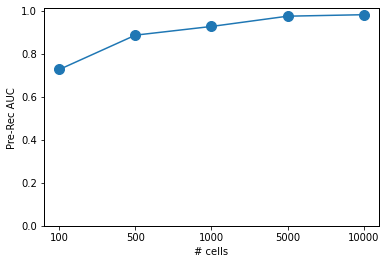

In [75]:
fig, ax = plt.subplots()
plt.plot(range(5), pr_auc)
plt.scatter(range(5), pr_auc, s=100, marker='o')
plt.ylim([0, 1.01])
plt.xlabel('# cells')
plt.ylabel('Pre-Rec AUC')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'])


In [72]:
(psix_100.loc[pos].qvals <= 0.05).sum()

1499

[Text(0, 0, '100'),
 Text(0, 0, '500'),
 Text(0, 0, '1000'),
 Text(0, 0, '5000'),
 Text(0, 0, '10000')]

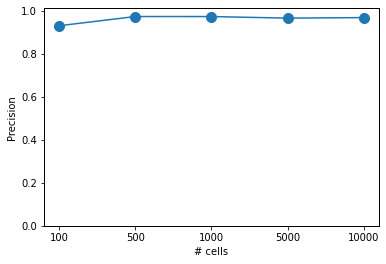

In [29]:
fig, ax = plt.subplots()
plt.plot(range(5), precision)
plt.scatter(range(5), precision, s=100, marker='o')
plt.ylim([0, 1.01])
plt.xlabel('# cells')
plt.ylabel('Precision')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'])


[Text(0, 0, '100'),
 Text(0, 0, '500'),
 Text(0, 0, '1000'),
 Text(0, 0, '5000'),
 Text(0, 0, '10000')]

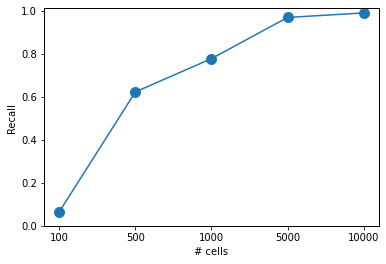

In [30]:
fig, ax = plt.subplots()
plt.plot(range(5), recall)
plt.scatter(range(5), recall, s=100, marker='o')
plt.ylim([0, 1.01])
plt.xlabel('# cells')
plt.ylabel('Recall')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'])


[Text(0, 0, '100'),
 Text(0, 0, '500'),
 Text(0, 0, '1000'),
 Text(0, 0, '5000'),
 Text(0, 0, '10000')]

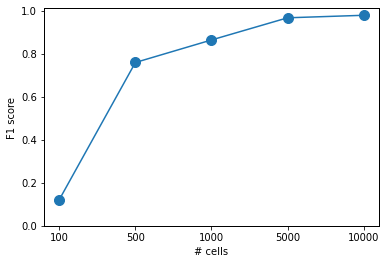

In [31]:
fig, ax = plt.subplots()
plt.plot(range(5), f1)
plt.scatter(range(5), f1, s=100, marker='o')
plt.ylim([0, 1.01])
plt.xlabel('# cells')
plt.ylabel('F1 score')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'])


In [36]:
pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))

    
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

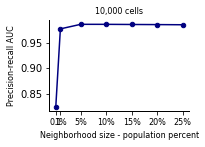

In [5]:
psix_5 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.001.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.01.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.05.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.15.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.2.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('psix_output_10000/k_sensitivity/k_0.25.tab.gz', sep='\t', index_col=0)


idx = psix_150.index.intersection(psix_150.index)

y = ((platonic_psi.loc[idx].max(axis=1) - platonic_psi.loc[idx].min(axis=1))>= 0.2).astype(int)
    
recall_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150]:
    pre, rec, thres = precision_recall_curve(y, x.loc[idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.array([0.1, 1, 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.array([0.1, 1, 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20)

ax.set_xticks(np.array([0.1, 1, 5, 10, 15, 20, 25]))

ax.set_xticklabels(['0.1', '1%', '5%', '10%', '15%', '20%', '25%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('10,000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


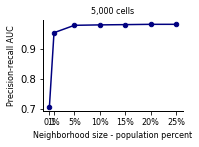

In [58]:
psix_5 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.001.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.01.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.05.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.15.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.2.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('psix_output_5000/k_sensitivity/k_0.25.tab.gz', sep='\t', index_col=0)


idx = psix_150.index.intersection(psix_150.index)

y = ((platonic_psi.loc[idx].max(axis=1) - platonic_psi.loc[idx].min(axis=1))>= 0.2).astype(int)
    
recall_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150]:
    pre, rec, thres = precision_recall_curve(y, x.loc[idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.array([0.1, 1, 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.array([0.1, 1, 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20)

ax.set_xticks(np.array([0.1, 1, 5, 10, 15, 20, 25]))

ax.set_xticklabels(['0.1', '1%', '5%', '10%', '15%', '20%', '25%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('5,000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


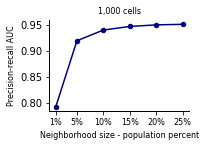

In [57]:
# psix_5 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.001.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.01.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.05.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.15.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.2.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('psix_output_1000/k_sensitivity/k_0.25.tab.gz', sep='\t', index_col=0)


idx = psix_150.index.intersection(psix_150.index)

y = ((platonic_psi.loc[idx].max(axis=1) - platonic_psi.loc[idx].min(axis=1))>= 0.2).astype(int)
    
recall_list = []
for x in [psix_10, psix_20, psix_30, psix_50, psix_100, psix_150]:
    pre, rec, thres = precision_recall_curve(y, x.loc[idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.array([ 1, 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.array([1, 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20)

ax.set_xticks(np.array([1, 5, 10, 15, 20, 25]))

ax.set_xticklabels(['1%', '5%', '10%', '15%', '20%', '25%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('1,000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


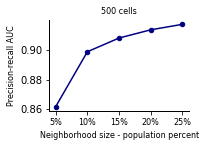

In [55]:
# psix_5 = pd.read_csv('psix_output_500/k_sensitivity/k_0.001.tab.gz', sep='\t', index_col=0)
# psix_10 = pd.read_csv('psix_output_500/k_sensitivity/k_0.01.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('psix_output_500/k_sensitivity/k_0.05.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('psix_output_500/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_500/k_sensitivity/k_0.15.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_500/k_sensitivity/k_0.2.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('psix_output_500/k_sensitivity/k_0.25.tab.gz', sep='\t', index_col=0)


idx = psix_150.index.intersection(psix_150.index)

y = ((platonic_psi.loc[idx].max(axis=1) - platonic_psi.loc[idx].min(axis=1))>= 0.2).astype(int)
    
recall_list = []
for x in [psix_20, psix_30, psix_50, psix_100, psix_150]:
    pre, rec, thres = precision_recall_curve(y, x.loc[idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.array([ 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.array([ 5, 10, 15, 20, 25]), recall_list, c='navy', zorder=20)

ax.set_xticks(np.array([ 5, 10, 15, 20, 25]))

ax.set_xticklabels(['5%', '10%', '15%', '20%', '25%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('500 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


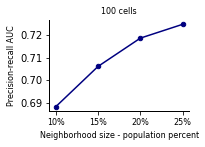

In [54]:
# psix_5 = pd.read_csv('psix_output_100/k_sensitivity/k_0.001.tab.gz', sep='\t', index_col=0)
# psix_10 = pd.read_csv('psix_output_100/k_sensitivity/k_0.01.tab.gz', sep='\t', index_col=0)
# psix_20 = pd.read_csv('psix_output_100/k_sensitivity/k_0.05.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('psix_output_100/k_sensitivity/k_0.1.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_100/k_sensitivity/k_0.15.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_100/k_sensitivity/k_0.2.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('psix_output_100/k_sensitivity/k_0.25.tab.gz', sep='\t', index_col=0)


idx = psix_150.index.intersection(psix_150.index)

y = ((platonic_psi.loc[idx].max(axis=1) - platonic_psi.loc[idx].min(axis=1))>= 0.2).astype(int)
    
recall_list = []
for x in [ psix_30, psix_50, psix_100, psix_150]:
    pre, rec, thres = precision_recall_curve(y, x.loc[idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.array([10, 15, 20, 25]), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.array([10, 15, 20, 25]), recall_list, c='navy', zorder=20)

ax.set_xticks(np.array([10, 15, 20, 25]))

ax.set_xticklabels(['10%', '15%', '20%', '25%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('100 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


In [ ]:
precision_recall_curve(y_, psix_results.loc[order].psix_score)